<a href="https://colab.research.google.com/github/rakeshsurampalli/smart_investment/blob/master/lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials



In [0]:

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the file
downloaded = drive.CreateFile({'id':'1uXnme3jK0iwMN6tBujDWVU1Td2fj2k3T'}) # replace the id with id of file you want to access
downloaded.GetContentFile('RELIANCE20.csv') 

In [0]:
import pandas as pd
series = pd.read_csv('RELIANCE20.csv') 



In [5]:
series.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,16.009800,16.095699,15.904300,16.0683,2.412877,47600787.0
1,1996-01-02,16.029301,16.107401,15.826200,15.9434,2.394122,77143764.0
2,1996-01-03,16.205000,16.943001,16.029301,16.0644,2.412292,95695836.0
3,1996-01-04,15.912100,15.962900,15.701300,15.9160,2.390007,99159504.0
4,1996-01-05,15.853600,15.853600,15.670000,15.8067,2.373594,76213503.0


In [6]:

import pandas as pd
from google.colab import files
from pandas import datetime
import matplotlib.pyplot as plt
import numpy 

from math import sqrt
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas import Series

from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler



from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot

Using TensorFlow backend.


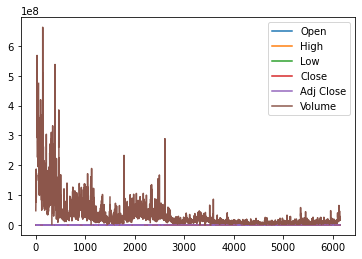

In [7]:
series.head()
series.plot()
pyplot.show()

In [8]:
series.head()
print("checking if any null values are present\n", series.isna().sum())

checking if any null values are present
 Date           0
Open         126
High         126
Low          126
Close        126
Adj Close    126
Volume       126
dtype: int64


In [9]:
series = series.dropna()
print("checking if any null values are present\n", series.isna().sum())
series = series.Close

checking if any null values are present
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


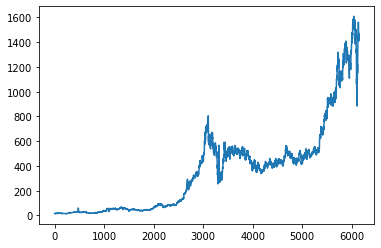

In [10]:
series.head()
series.plot()
pyplot.show()

In [0]:
#sales = series.Close
# series.head()
# series.plot()
# pyplot.show()

In [0]:
sales_diff = series.Close.diff(periods=1)

In [0]:
sales = sales_diff[1:]
sales.head()

1   -0.1249
2    0.1210
3   -0.1484
4   -0.1093
5   -0.6326
Name: Close, dtype: float64

In [0]:
X = sales
time = numpy.arange(6026, dtype="float32")

print(X)
X.size
split_time = 5900
time_train = time[:split_time]
time_valid = time[split_time:]
x_train = X[0:split_time]
x_test = X[split_time:]


1       -0.124900
2        0.121000
3       -0.148400
4       -0.109300
5       -0.632600
          ...    
6148    -9.699951
6149    -7.500000
6150    21.500000
6151    26.699951
6152    -7.849976
Name: Close, Length: 6026, dtype: float64


In [0]:
X = sales.values
supervised = timeseries_to_supervised(X, 1)
print(supervised.head())

NameError: ignored

Month=1, Predicted=1465.387724, Expected=1496.449951
Month=2, Predicted=1496.477689, Expected=1435.949951
Month=3, Predicted=1435.977690, Expected=1459.400024
Month=4, Predicted=1459.427762, Expected=1440.750000
Month=5, Predicted=1440.777739, Expected=1408.900024
Month=6, Predicted=1408.927763, Expected=1433.699951
Month=7, Predicted=1433.727689, Expected=1441.250000
Month=8, Predicted=1441.277738, Expected=1431.550049
Month=9, Predicted=1431.577788, Expected=1424.050049
Month=10, Predicted=1424.077788, Expected=1445.550049
Month=11, Predicted=1445.577787, Expected=1472.250000
Month=12, Predicted=1472.277738, Expected=1464.400024
Test RMSE: 26.768


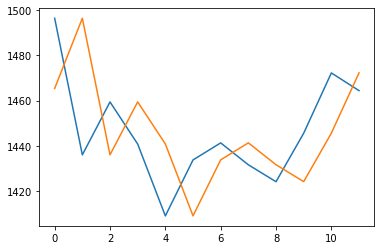

In [11]:
def timeseries_to_supervised(data, lag=1):
	df = DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]
 
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled
 
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]
 
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model
 
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]
 
 
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)
 
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values
 
# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]
 
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)
 
# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
 
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))
 
# report performance
rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-12:])
pyplot.plot(predictions)
pyplot.show()